# Thick films : Fast Fourier Transform (FFT) Method

When the spectrum contains a large number of peaks (> 15), the most suitable method is to make an FFT. Theoritical details will be provided in an upcoming publication. 

Assuming the previous procedure has been followed and the resulting peak plot is as follows :

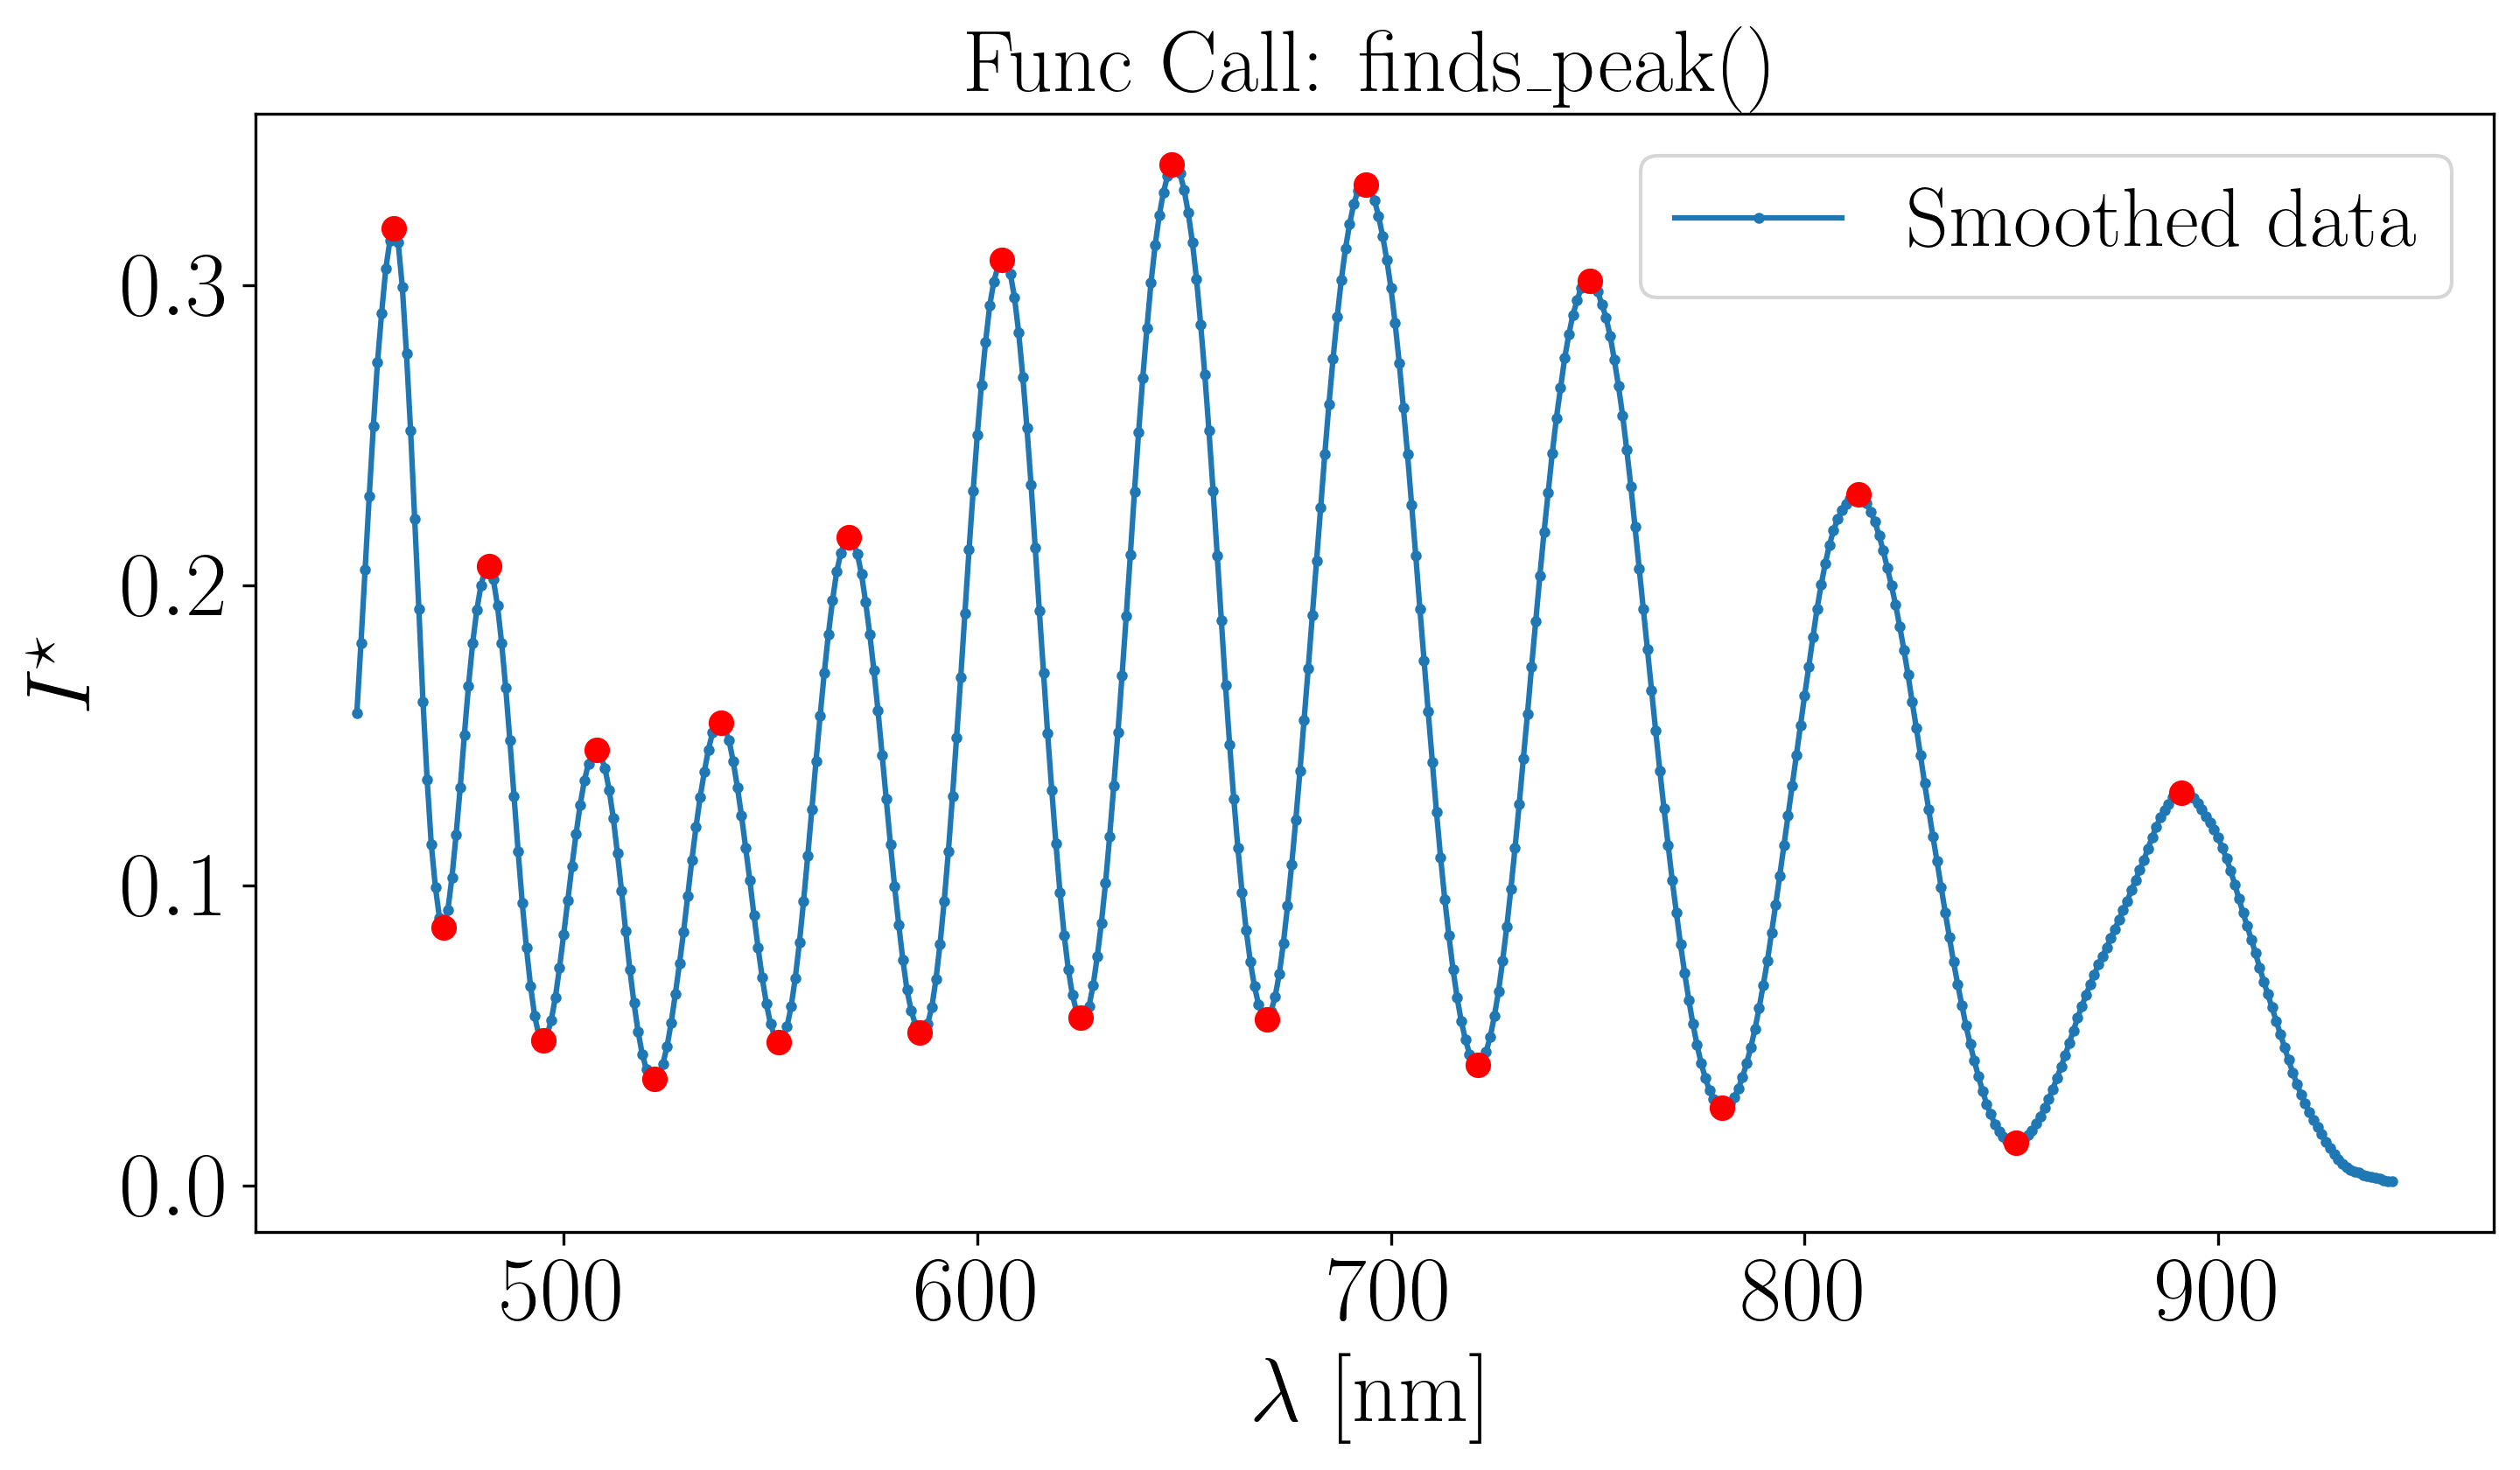

In [1]:
from pathlib import Path
from optifik.io import load_spectrum
from optifik.analysis import plot_spectrum
from optifik.analysis import smooth_intensities
from optifik.analysis import finds_peak

# Define the path to the folder containing your .xy file
datafile_path = Path('../../data/basic/003582.xy')

# Load wavelengths and intensities from the file
wavelengths, intensities = load_spectrum(datafile_path, 
                                         wavelength_min=450, 
                                         wavelength_max=1000)

# Smoothing the intensity
intensities_smoothed = smooth_intensities(intensities)

# Peak detection function
# min_peak_prominence and min_peak_distance can be adjusted.
peaks_min, peaks_max = finds_peak(wavelengths, intensities_smoothed, 
                                  min_peak_prominence=0.018, 
                                  min_peak_distance=10, 
                                  plot=True)

For this case, 21 peak have been successfully identified. To derive the film thickness $h$, we use the `thickness_from_fft` function from the `optifik.fft` module. Here an exemple of plot you can obtain.

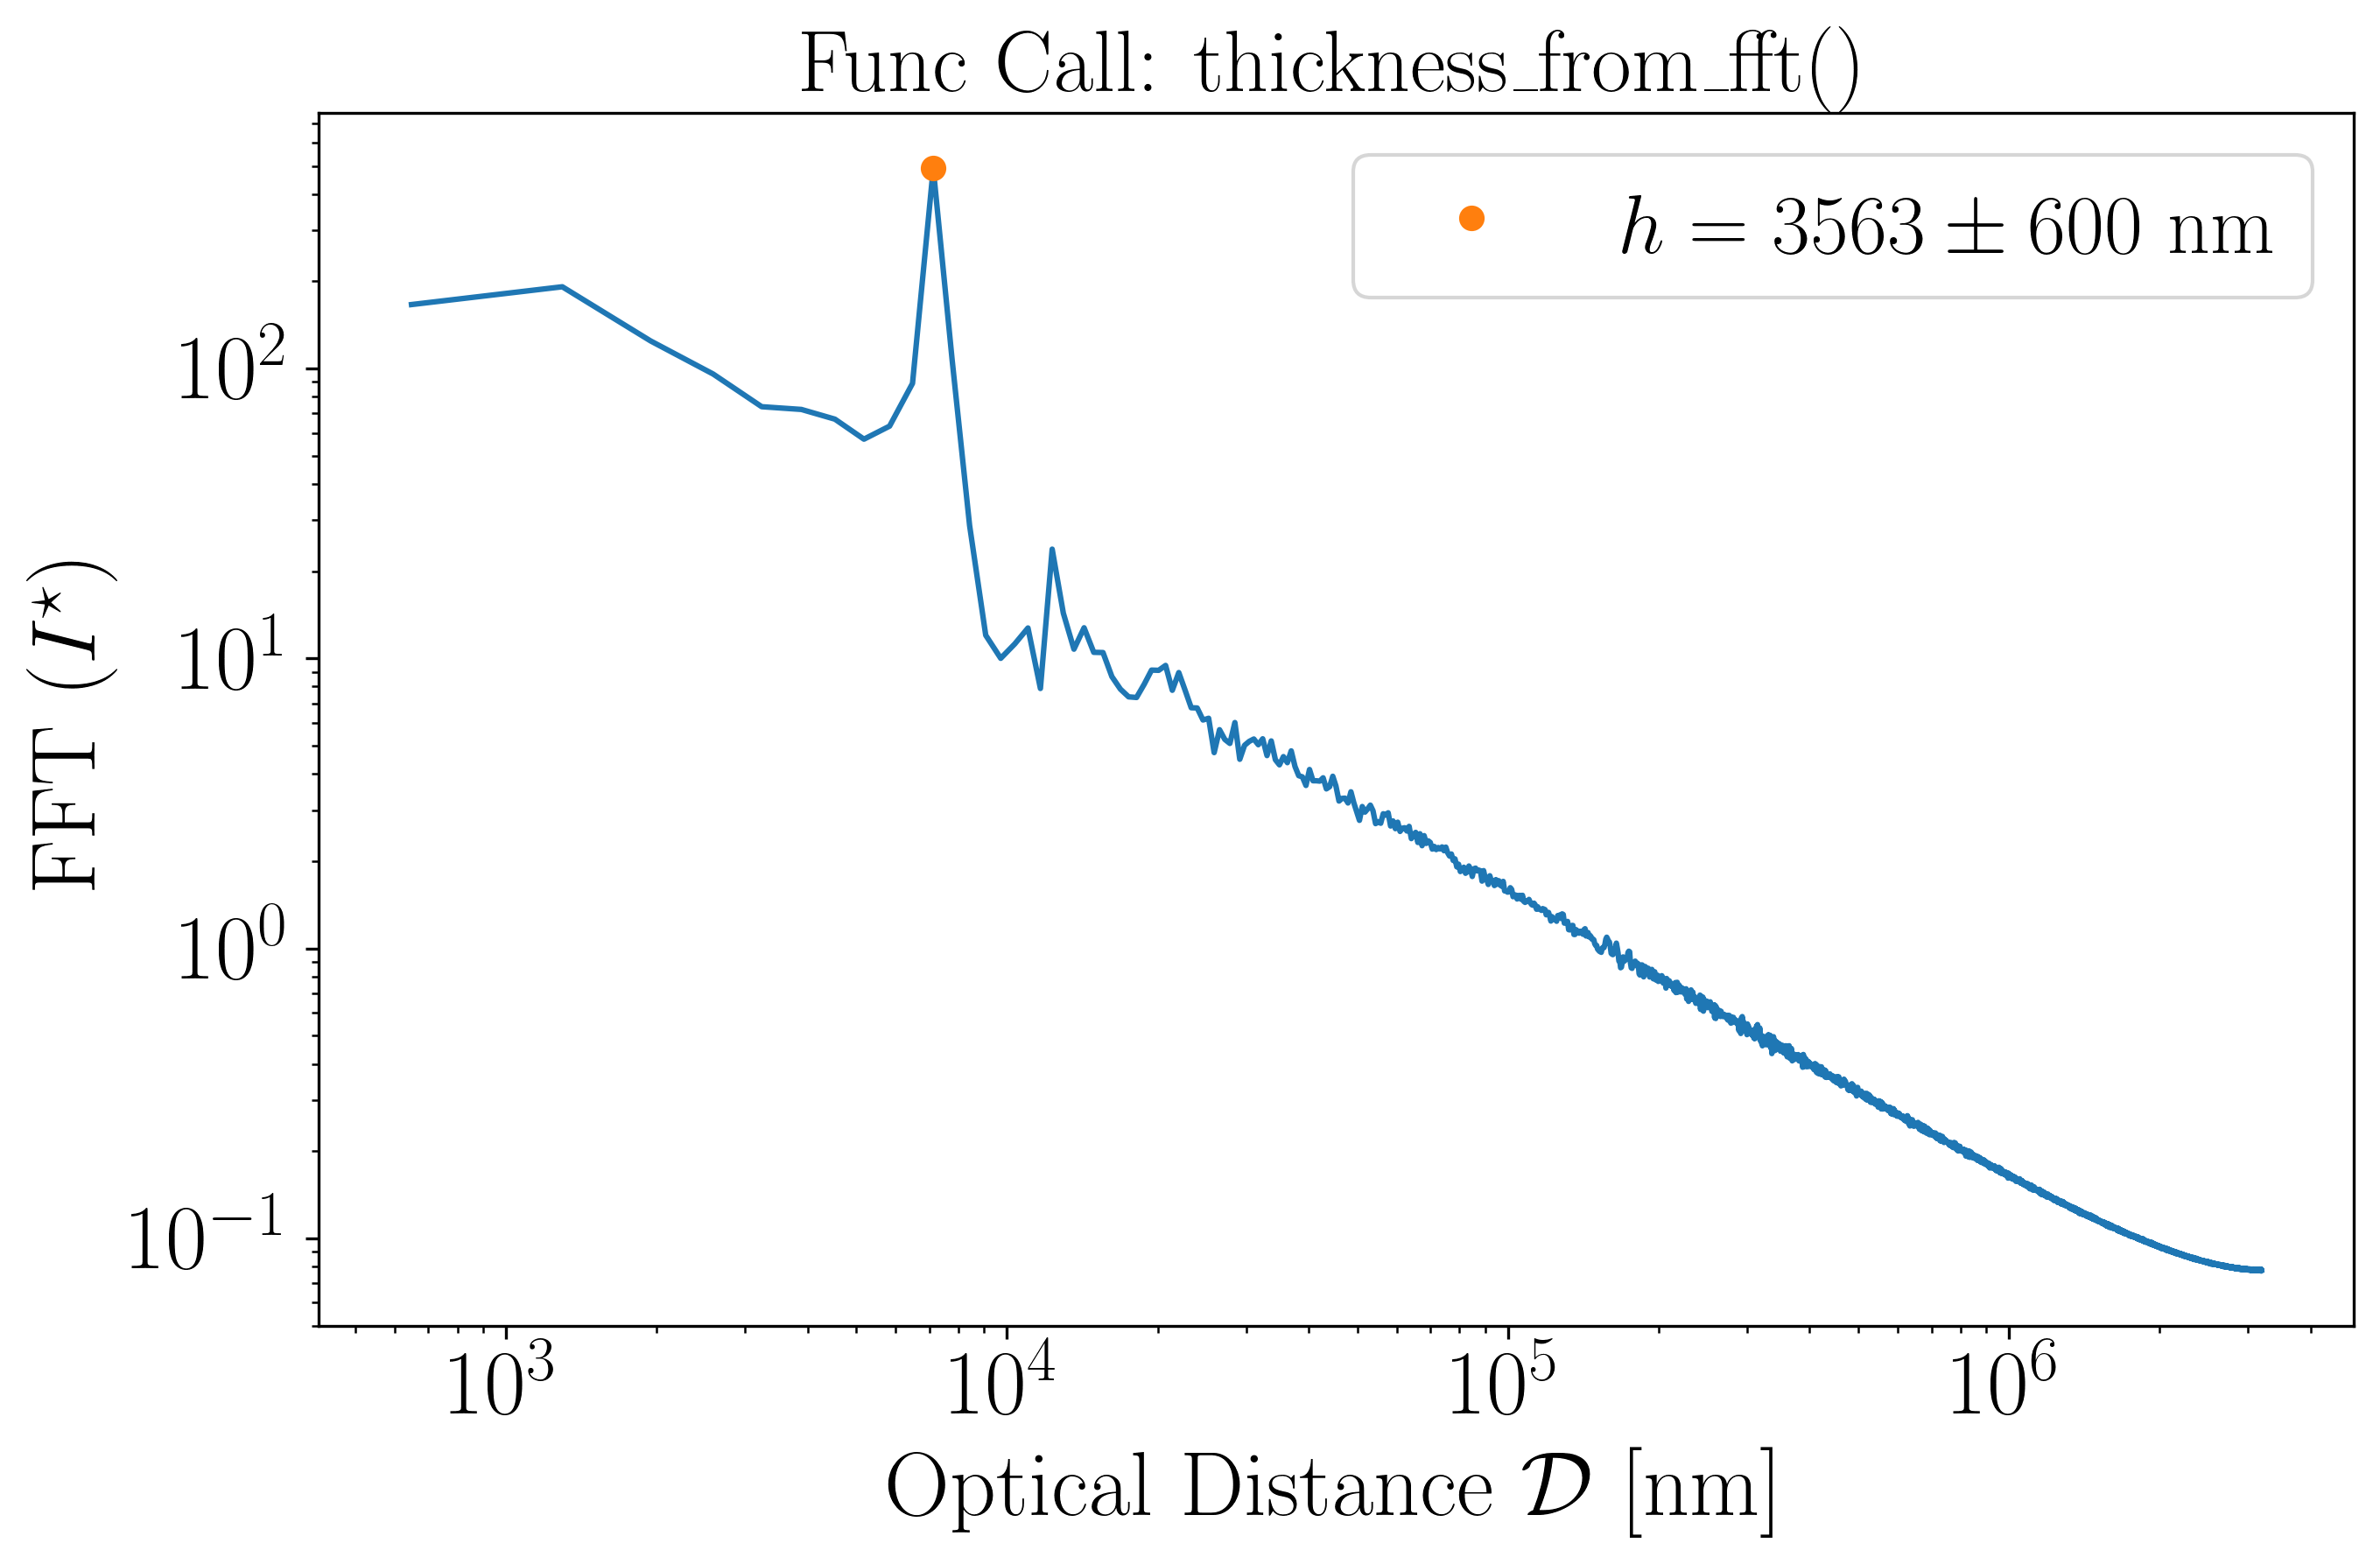

In [2]:
from optifik.fft import thickness_from_fft

# Determine the film thickness by Fast Fourier Transform
result = thickness_from_fft(wavelengths, intensities_smoothed,
                           refractive_index=1.33,
                           num_half_space=None,
                           plot=True)

The `thickness_from_fft` function automatically determines the film thickness.


In [3]:
print(result)

             thickness: np.float64(3562.5856479969143)
 thickness_uncertainty: np.float64(647.742845090348)


Values can be accessed as follows:


In [4]:
print(result.thickness)
print(result.thickness_uncertainty)

3562.5856479969143
647.742845090348


The uncertainty is determined from the step size in the Fourier space, which is determined by the length of the signal, *ie* the wavelength range. It is possible to reduce this uncertainty by applying a zero-padding to the data increase this range, which helps to narrow down the peak detection. 

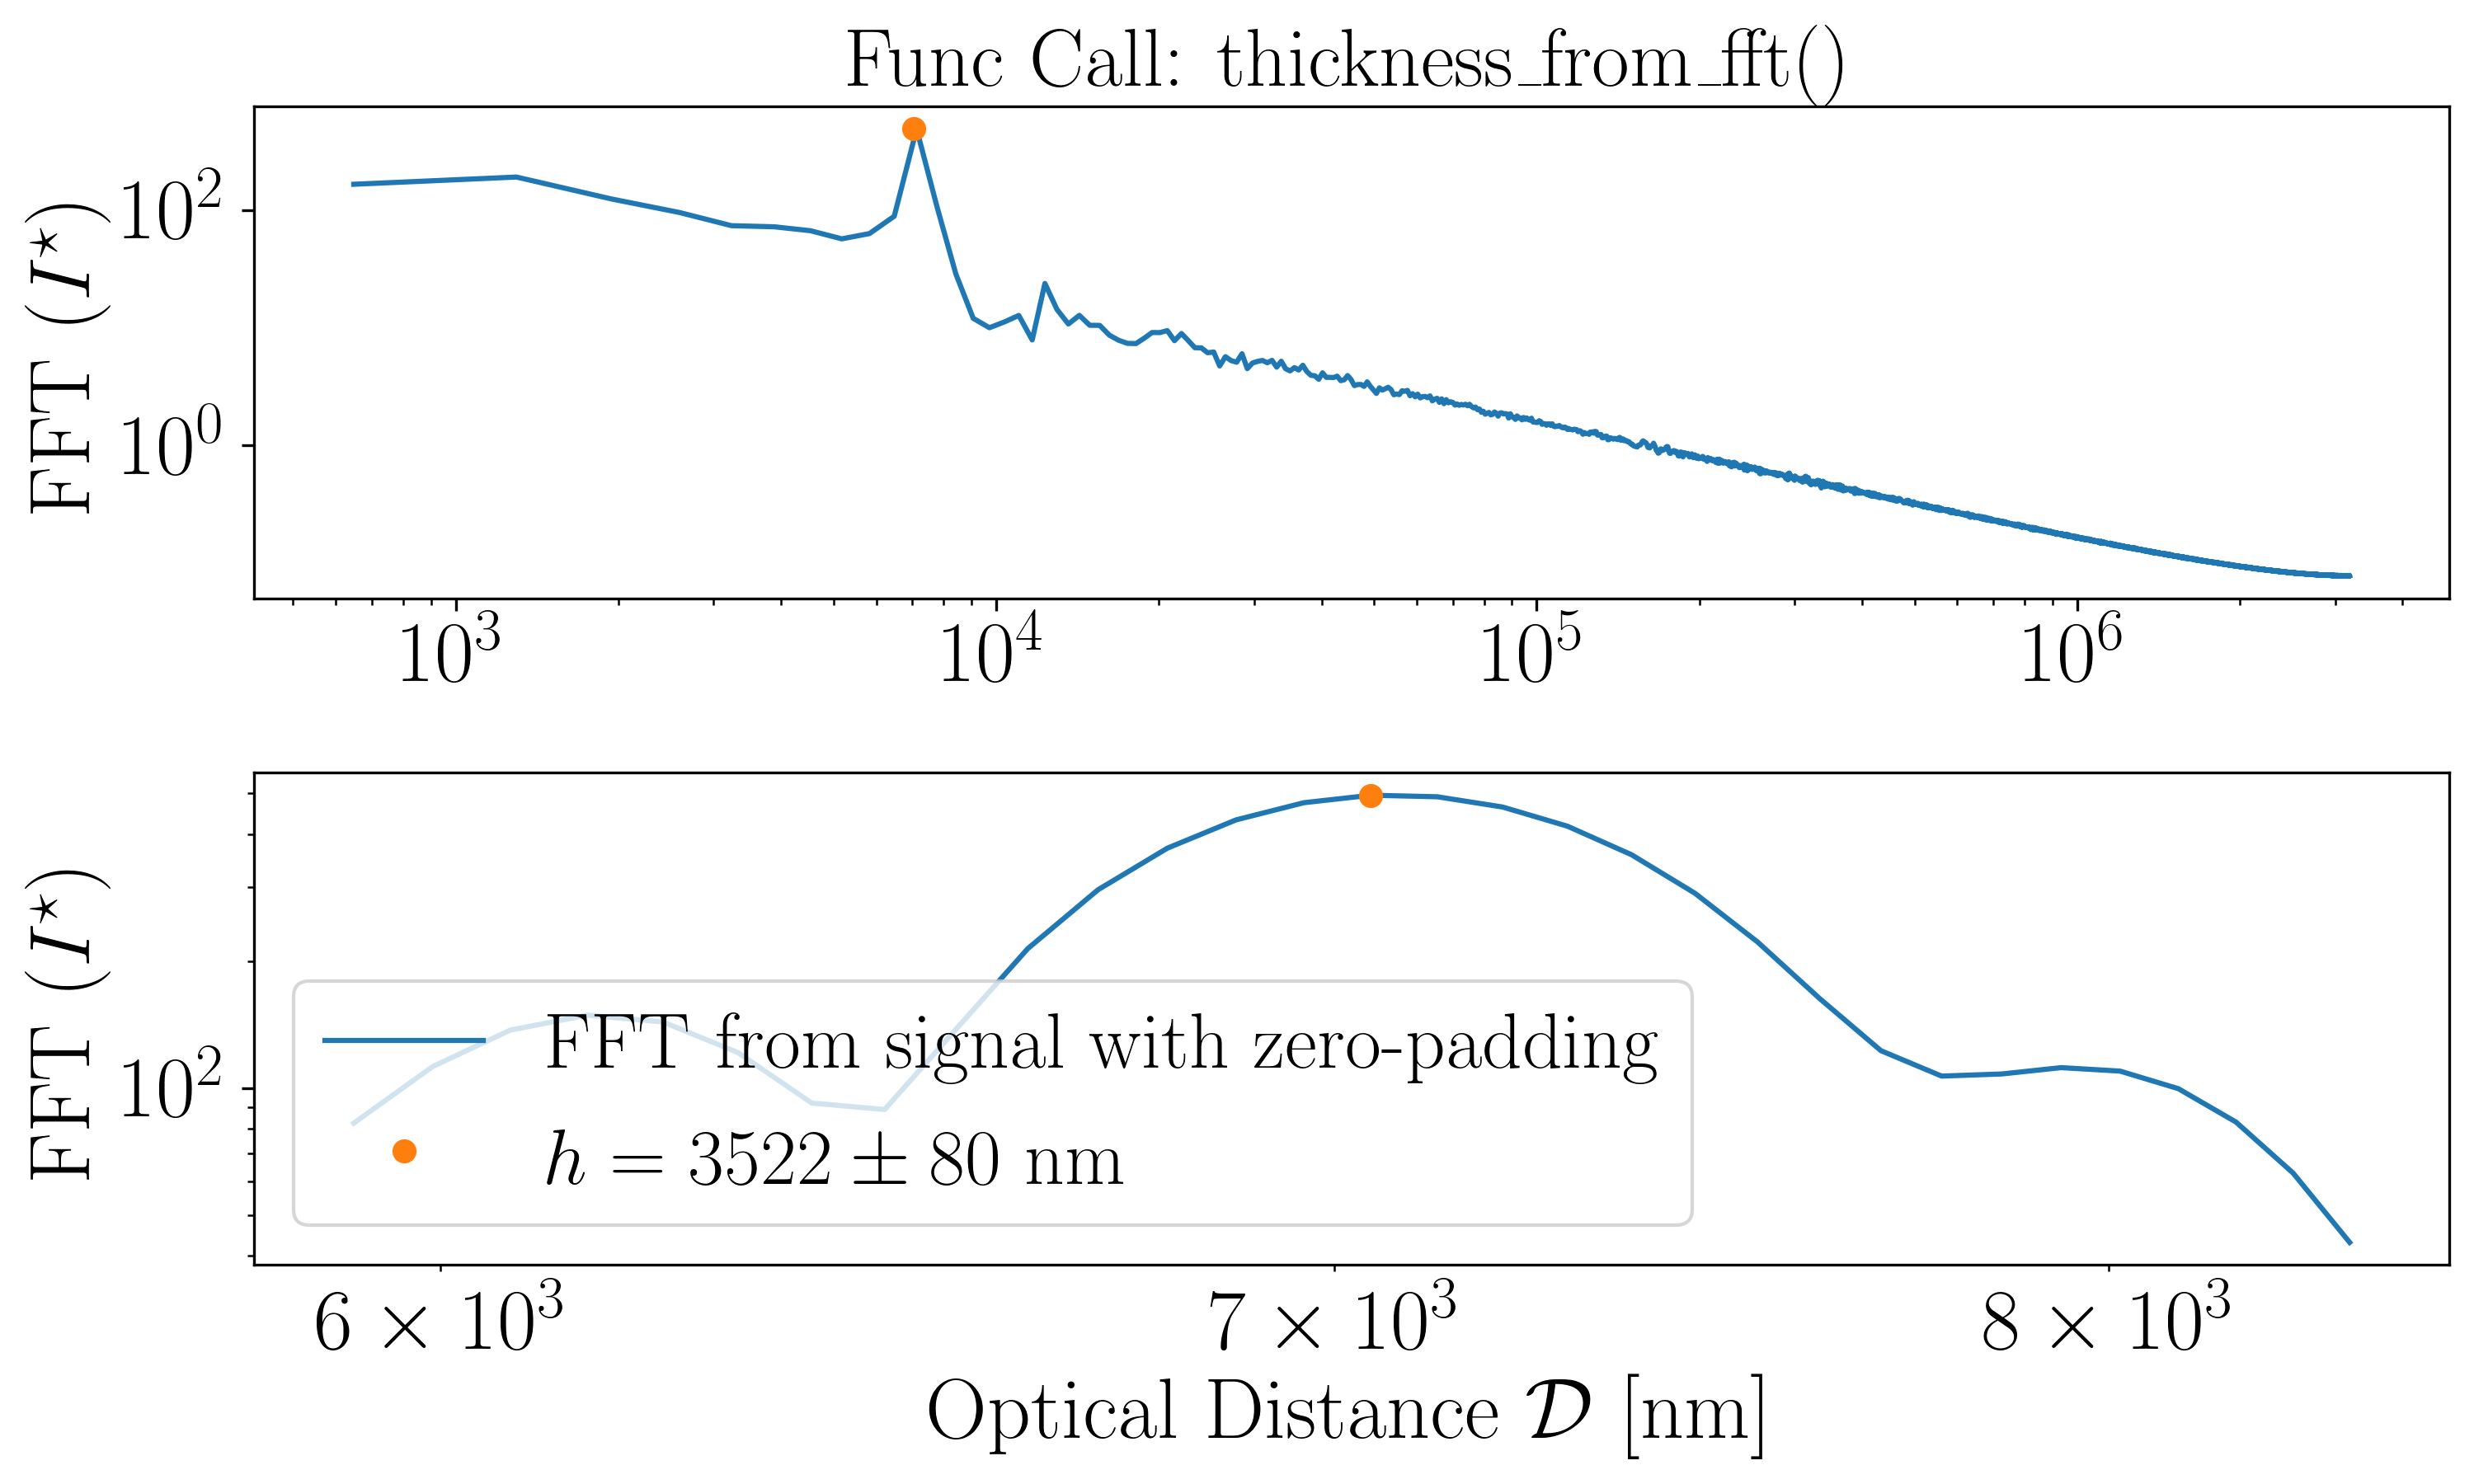

In [5]:
result = thickness_from_fft(wavelengths, intensities_smoothed,
                           refractive_index=1.33,
                           num_half_space=None,
                           N_padding=8,
                           plot=True)

- You can specify the medium's refractive index using the `refractive_index` parameter.
- You can also provide a refractive index array $n(\lambda)$ as an `refractive_index` input.
- Even if peak detection occasionally fails, it has no impact on the FFT since the transform is applied to the entire dataset.

In the following, we will see the case where the spectrum contains only few peaks.